**Churn Prediction in Telecom Industry using Logistic Regression**

*Importing Module Packages*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Accessing .csv file

In [5]:
churn_data = pd.read_csv('Telecom-Churn-Prediction.csv')

*Displaying Data*

In [6]:
churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


*To check the shape of data i.e., Number of rows and columns*

In [7]:
churn_data.shape

(7043, 21)

*To check columns in the dataset*

In [8]:
churn_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

*To check the datatype*

In [9]:
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**DATA INSPECTION**

In [10]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
churn_data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


*To check the ststistics part of the dataset*

In [13]:
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [18]:
cshape = churn_data.shape
print(f"\n In Telecom Industry Dataset \n Rows: {cshape[0]} \n Columns: {cshape[1]}")


 In Telecom Industry Dataset 
 Rows: 7043 
 Columns: 21


**DATA CLEANING**

*To check the null values*

In [19]:
churn_data.isnull().sum()*100/churn_data.shape[0]

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [20]:
print("TOTAL CHARGES\n")
churn_data.TotalCharges.describe()

TOTAL CHARGES



count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [21]:
churn_data.TotalCharges = churn_data.TotalCharges.replace(' ',np.nan)

In [22]:
churn_data.TotalCharges = pd.to_numeric(churn_data.TotalCharges)

In [23]:
churn_data.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [24]:
cal = (churn_data.TotalCharges/churn_data.MonthlyCharges).median() * churn_data.MonthlyCharges

In [25]:
churn_data.TotalCharges = cal.where(churn_data.MonthlyCharges == np.nan,other = churn_data.TotalCharges)

In [26]:
churn_data.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [29]:
churn_data.describe().style.background_gradient(cmap = "Purples")

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [30]:
churn_data.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


**EXPLORATORY DATA ANALYSIS**

*Churn (Target Variable)*

In [31]:
churn_data.Churn

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [32]:
churn_data.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [33]:
churn_data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [34]:
churn_data.Churn.describe()

count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object

**Inference:**
* From the above analysis we can conclude two things:-
* The dataset is not balanced.
* The Yes has 1869 and No has 5174
* So we can analyse the data with other features while taking the target values seperately.

**SEETING SEABORN ENVIRONMENT**

In [35]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


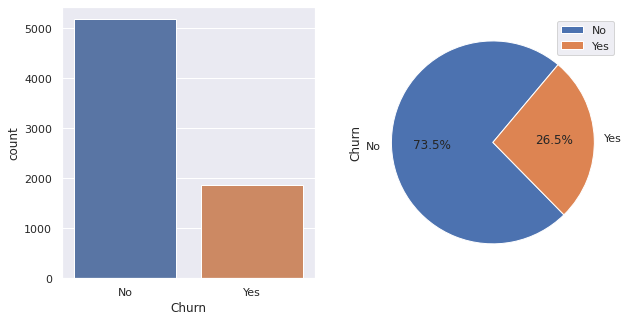

In [36]:
fig, axs = plt.subplots(1,2, figsize = (10,5))
plt1 = sns.countplot(churn_data['Churn'], ax = axs[0])

pie_data = pd.DataFrame(churn_data['Churn'].value_counts())
pie_data.plot.pie( subplots=True,labels = pie_data.index.values, autopct='%1.1f%%', figsize = (10,5), startangle= 50, ax = axs[1])
plt.gca().set_aspect('equal')

plt.show()

* From the above pie chart on the right side we can observe that about 26.5%(nearly = 27%) of the Telecom Customers from the dataset we took end up churning.

**DATA CLEANING**

*Removing the missing values*

In [37]:
churn_data.dropna(inplace=True)

*Removing customers Ids from the dataset*

In [38]:
df = churn_data.iloc[:,1:]

*Converting the Yes and No values into 1 and 0*

In [39]:
df["Churn"].replace(to_replace='Yes',value=1,inplace=True)
df["Churn"].replace(to_replace='No',value=0,inplace=True)


*Converting all the analytical frames into dummy data set*

In [40]:
df_dummy = pd.get_dummies(df)
df_dummy.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


**VISUALIZATION OF CHURN WITH OTHER VARIABLES**

*Get correlational of churn with other variables:*

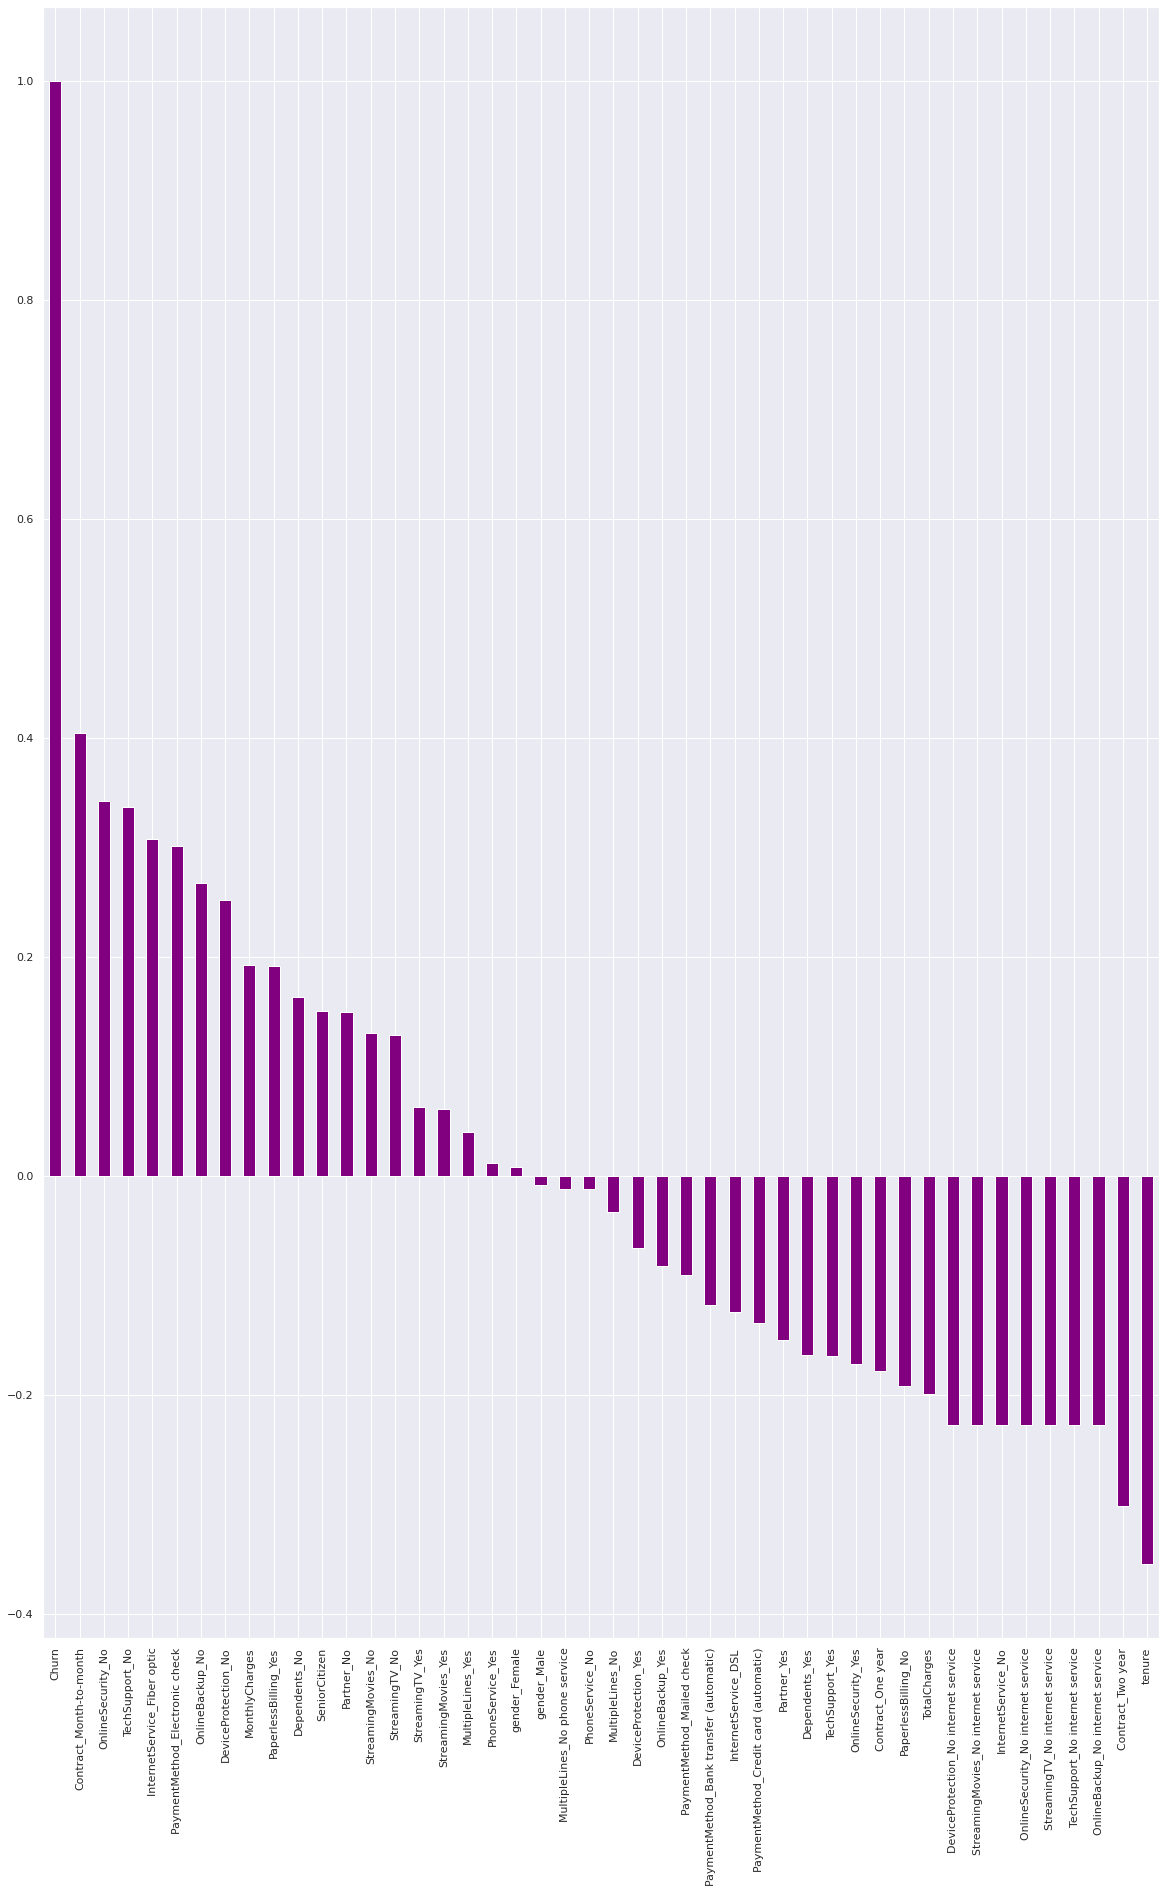

In [43]:
sns.set()
plt.figure(figsize=(16,9))
df_dummy.corr()['Churn'].sort_values(ascending=False).plot(kind='bar',figsize=(20,30),color='purple')

**LOGISTIC REGRESSION**

In [47]:
#We use the data frame where we created dummy variables
X = df_dummy.drop(columns = ['Churn'])
y = df_dummy['Churn'].values

*Scaling all the variables to a range of 0 to 1*

In [48]:
from sklearn.preprocessing import MinMaxScaler
feature = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = feature

**Train Test Split**


*Create Train and Test Data*

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Building the Model**

*Running logistic regression model*

In [50]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)
print(f"\nModel Type : ",model,end="\n\n")


Model Type :  LogisticRegression()



*Generate model prediction data for train and test sets*

In [51]:
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

**How many times was the classifier correct on the training set?**

*Finding the residual differences between train data and predicted train data*

In [52]:
residuals = np.abs(y_train - y_hat_train) 

*Print value counts of our predicted values*

In [53]:
print(pd.Series(residuals).value_counts())

0    3949
1     973
dtype: int64


*Print normalized value counts of our predicted values*

In [54]:
print(pd.Series(residuals).value_counts(normalize = True))

0    0.802316
1    0.197684
dtype: float64


* Train Set Results:-
  * 3949 Correct
  * 973 Incorrect
  * 80.23% Accuracy

In [55]:
# Repeat previous step with test data
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print('=====================================')
print(pd.Series(residuals).value_counts(normalize = True))

0    1704
1     406
dtype: int64
0    0.807583
1    0.192417
dtype: float64


* Train Set Results:-
  * 1704 Correct
  * 406 Incorrect
  * 80.75% Accuracy

In [60]:
print("y Train\n")
y_train

y Train



array([1, 1, 0, ..., 1, 0, 1])

In [59]:
print("y Test\n")
y_test

y Test



array([0, 0, 0, ..., 0, 0, 0])

In [61]:
print("Coefficient of Model\n")
model.coef_

Coefficient of Model



array([[ 0.27196204, -2.89018875, -0.22684727,  0.92505208,  0.01083979,
        -0.01245434,  0.01507257, -0.01668711,  0.05885141, -0.06046595,
         0.09619972, -0.09781426, -0.16025164,  0.09619972,  0.06243738,
        -0.42291654,  0.53384179, -0.1125398 ,  0.24068014, -0.1125398 ,
        -0.12975488,  0.10136144, -0.1125398 ,  0.00956382,  0.07520261,
        -0.1125398 ,  0.03572264,  0.24372955, -0.1125398 , -0.13280429,
        -0.11478968, -0.1125398 ,  0.22571494, -0.04058994, -0.1125398 ,
         0.15151519,  0.75306092, -0.02563551, -0.72903995, -0.13608093,
         0.13446639, -0.05154744, -0.12481776,  0.25043212, -0.07568146]])

In [62]:
print("Intercept of Model\n")
model.intercept_

Intercept of Model



array([-1.01808582])

In [63]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [64]:
from sklearn import metrics
prediction_test = result.predict(X_test)

*Printing the prediction accuracy*

In [65]:
print (f"\nMetrics Accuracy Score :- {metrics.accuracy_score(y_test, prediction_test)}\n")


Metrics Accuracy Score :- 0.8075829383886256



In [66]:
prediction_test

array([1, 0, 0, ..., 0, 0, 0])

In [67]:
print("Mean Absolute Error :-",mean_absolute_error(y_test,prediction_test))

Mean Absolute Error :- 0.1924170616113744


In [68]:
print("Mean Squared Error :-",np.sqrt(mean_squared_error(y_test,prediction_test)))

Mean Squared Error :- 0.43865369212098787


In [69]:
print("R2 Score error :-",r2_score(y_test,prediction_test))

R2 Score error :- -0.02299976116551239


In [70]:
from sklearn.metrics import classification_report

*Classification Report between y test and prediction*

In [72]:
print("Classification Report between y test and prediction\n")
print(classification_report(y_test,prediction_test))

Classification Report between y test and prediction

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1580
           1       0.64      0.54      0.58       530

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



*Get the weights of all the variables*

AxesSubplot(0.125,0.125;0.775x0.755)


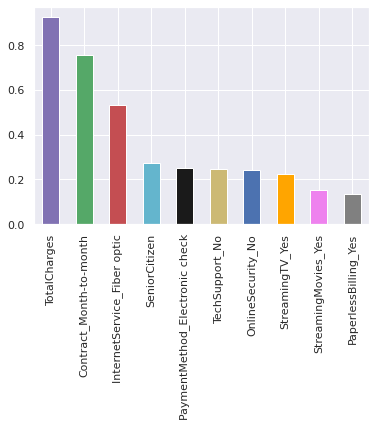

In [73]:
weight = pd.Series(model.coef_[0],index=X.columns.values)
print (weight.sort_values(ascending = False)[:10].plot(kind='bar',color=['m','g','r','c','k','y','b','orange','violet','grey']))

AxesSubplot(0.125,0.125;0.775x0.755)


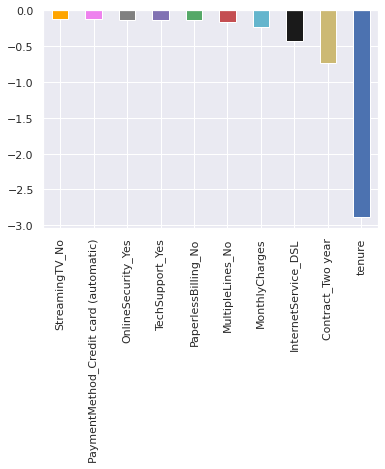

In [74]:
print(weight.sort_values(ascending = False)[-10:].plot(kind='bar',color=['orange','violet','grey','m','g','r','c','k','y','b']))